### Autocorrelation Function and Partial Autocorrelation Function

In [33]:
# Imports
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Register
register_matplotlib_converters()

### Ice Cream Production Data

In [34]:
# Read data
df_icecream = pd.read_csv('Data/ice_cream.csv')

In [35]:
df_icecream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [36]:
# Rename columns
df_icecream.rename(columns={'DATE': 'Date', 'IPN31152N': 'Production'}, inplace=True)

In [37]:
# Convert date column to datetime type
df_icecream['Date'] = pd.to_datetime(df_icecream.Date)

In [38]:
# Set date column as index => easier plotting
df_icecream.set_index('Date', inplace=True)

In [39]:
# Just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_icecream = df_icecream[start_date:]

In [40]:
df_icecream.head()

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


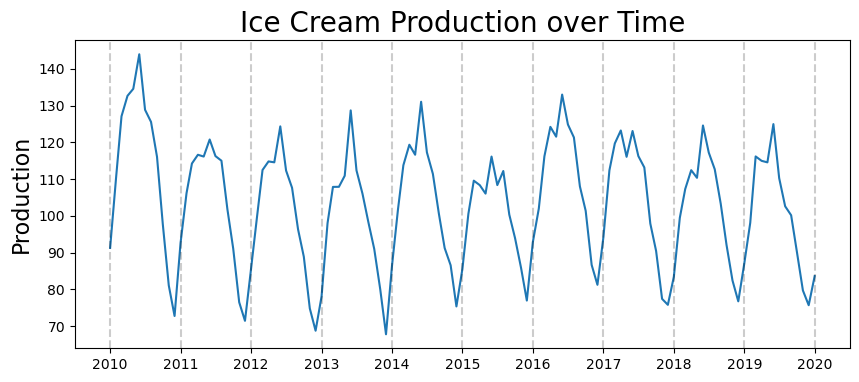

In [42]:
plt.figure(figsize=(10,4))
plt.plot(df_icecream.Production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2010, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=.2)

#### ACF

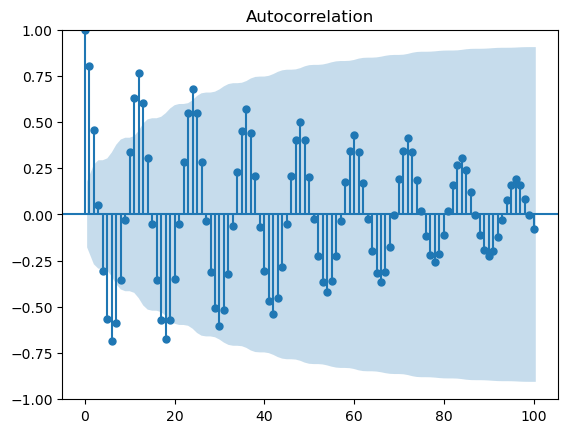

In [43]:
acf_plot = plot_acf(df_icecream.Production, lags=100)

ACF going to zero in the long-run. Blue bars are error bands – anything within the blue bars is *not* statistically significant. Based on decaying ACF, we are likely dealing with an **autoregressive process**.

#### PACF

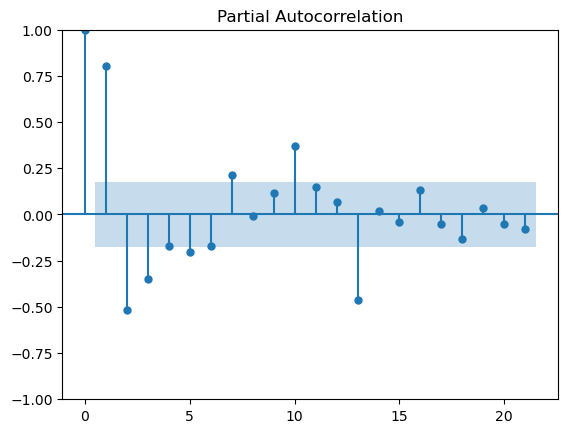

In [44]:
pacf_plot = plot_pacf(df_icecream.Production)

We can see strong partial correlations at lags one, two, three, ten, and thirteen. Based on PACF, we should start with an autoregressive model with lags 1, 2, 3, 10, and 13.

### Stock Data

In [120]:
import yfinance as yf

In [121]:
# Define ticker symbol
tickerSymbol = 'SPY' # S&P 500

In [122]:
# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [123]:
# Get historical prices for this ticker as pd.DataFrame
df_ticker = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [124]:
# Subset for closing price
df_ticker = df_ticker[['Close']]

In [125]:
df_ticker.head()

,Close
Date,
2015-01-02 00:00:00-05:00,173.704910
2015-01-05 00:00:00-05:00,170.567886
2015-01-06 00:00:00-05:00,168.961258
2015-01-07 00:00:00-05:00,171.066788
2015-01-08 00:00:00-05:00,174.102371


In [126]:
# Remove time
df_ticker.index = df_ticker.index.date

In [127]:
df_ticker.head()

,Close
2015-01-02,173.704910
2015-01-05,170.567886
2015-01-06,168.961258
2015-01-07,171.066788
2015-01-08,174.102371


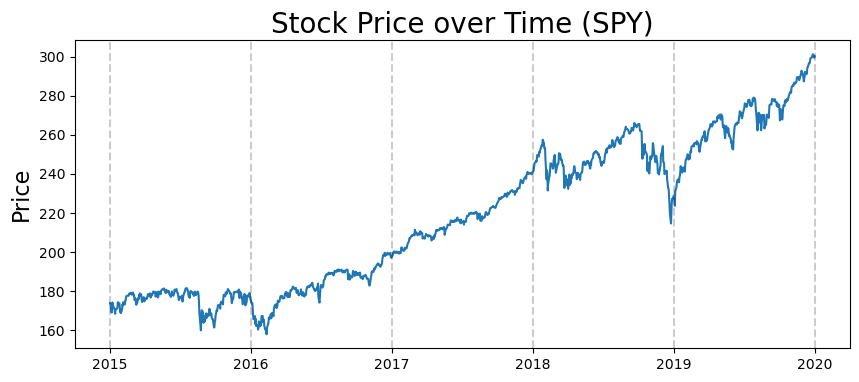

In [128]:
plt.figure(figsize=(10,4))
plt.plot(df_ticker.Close)
plt.title(f'Stock Price over Time ({tickerSymbol})', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=.2)

#### Stationarity: Take first difference

In [112]:
# Take first difference
first_diff = df_ticker.Close.values[1:] - df_ticker.Close.values[:-1] # price tomorrow - price today
first_diff = np.concatenate([first_diff, [0]])

In [113]:
df_ticker.loc[:,'FirstDiff'] = first_diff

In [114]:
df_ticker.head()

,Close,FirstDiff
2015-01-02,173.704910,-3.137024
2015-01-05,170.567886,-1.606628
2015-01-06,168.961258,2.105530
2015-01-07,171.066788,3.035583
2015-01-08,174.102371,-1.395248


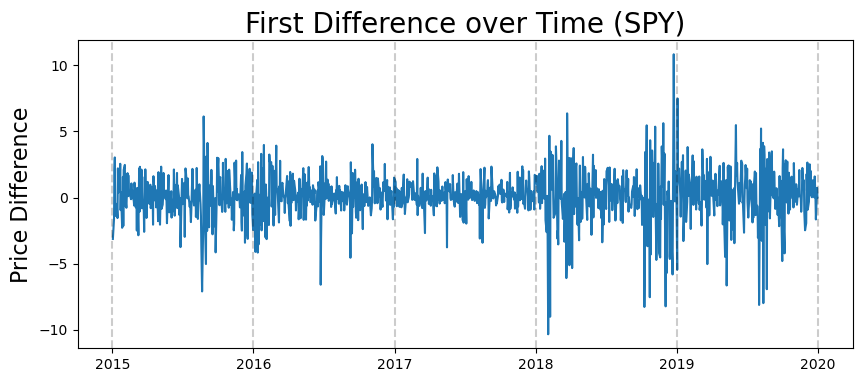

In [117]:
plt.figure(figsize=(10,4))
plt.plot(df_ticker.FirstDiff)
plt.title(f'First Difference over Time ({tickerSymbol})', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=.2)

#### ACF

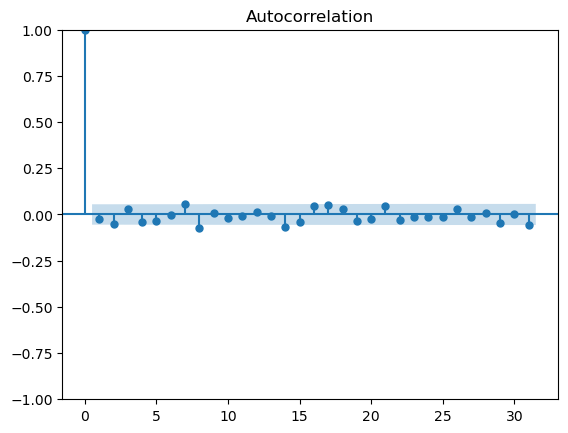

In [118]:
acf_plot = plot_acf(df_ticker.FirstDiff)

ACF ist *not* that informative.

#### PACF

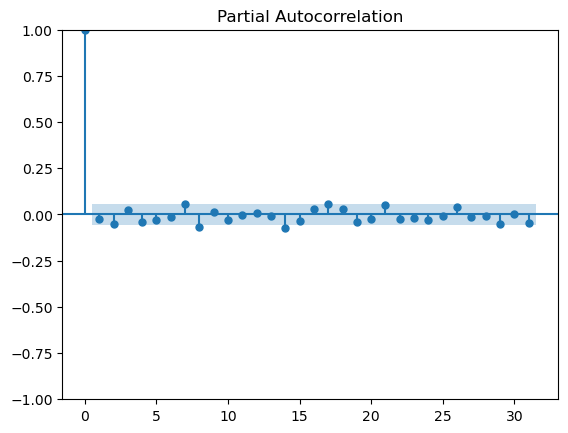

In [119]:
pacf_plot = plot_pacf(df_ticker.FirstDiff)

PACF also does *not* tell us much.